# Task

# here's several helpful packages to load in 

In [1]:
import warnings
import pandas as  pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    # linear algebra
import matplotlib.pyplot as plt # visulization
import seaborn as sns # visulization
import missingno as msno # handling missing value
from sklearn.preprocessing import StandardScaler,MinMaxScaler # dataset range (0 to 1)
from sklearn.model_selection import train_test_split # splitting the test dataset and train dataset
from sklearn.metrics import confusion_matrix,accuracy_score # model perfomance 
from sklearn.linear_model import LogisticRegression  # clasiifier
from sklearn.neighbors import KNeighborsClassifier # # clasiifier
from sklearn.tree import DecisionTreeClassifier # # clasiifier
from sklearn.ensemble import RandomForestClassifier# clasiifier
from sklearn.svm import SVC # clasiifier


In [2]:
# read dataset 
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [3]:
#  show  top 5 row of train data set
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#  show  top 5 row of test data set
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# numbers of columns in datasets
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# dataset shape (row ,columns)
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [7]:
# data types in datasets
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Which features are categorical?

These values classify the samples into sets of similar samples.Within categorical features are the values
nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

 Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

# Which features are numerical?

These values change from sample to sample.Within numerical features are the values
discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: Age, Fare. Discrete: SibSp, Parch

In [8]:
# checking null values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# DATA EXPLORATION


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011B3A438>,
      dtype=object)

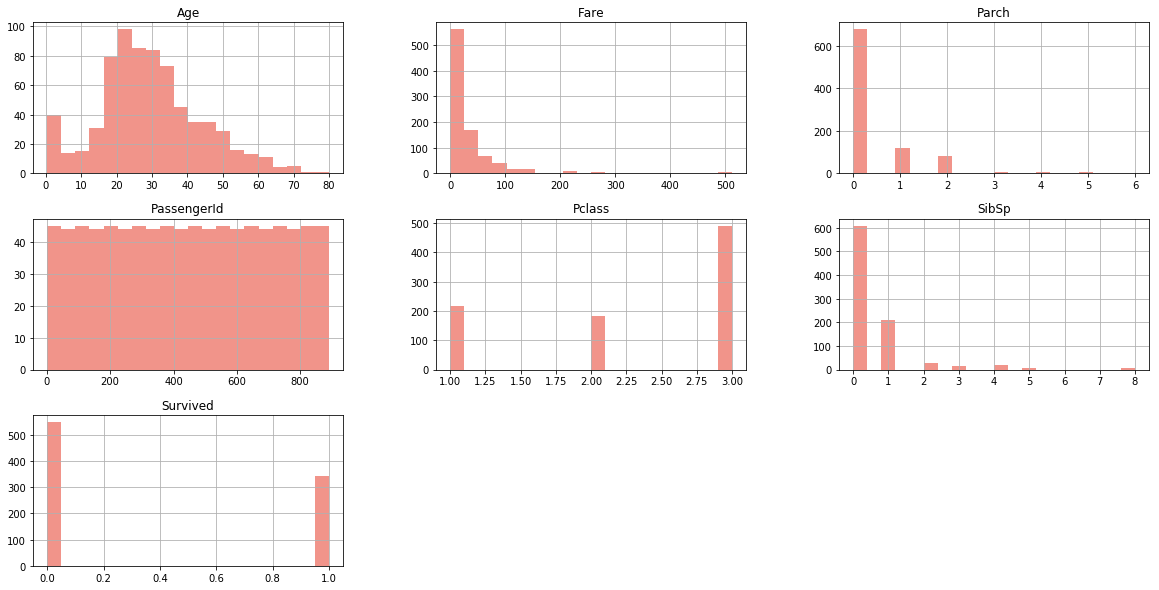

In [9]:
# Get some statistical information
titanic_train.hist(bins=20,figsize=(20,10),color="#F1948A")

If we ignore the passenger id, we can see all other features are on the same scale except "AGE"
you can remove the passenger id before doing this

In [10]:
# What is the distribution of numerical feature values across the samples?

titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
# What is the distribution of categorical features?
titanic_train.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Karaic, Mr. Milan",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
# Survived by pclass
titanic_train[["Pclass","Survived"]].groupby("Pclass",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
titanic_train[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
# Survived by Sex
titanic_train[["Survived","Sex"]].groupby("Sex").mean().sort_values(by="Survived",ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
titanic_train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
Survived_or_not=titanic_train.Survived.value_counts()

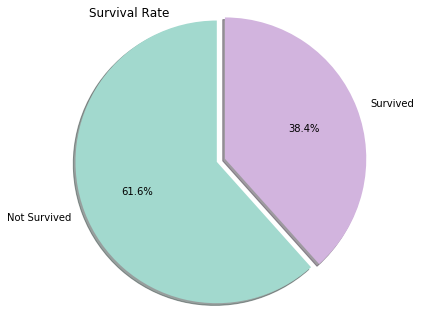

In [18]:
plt.figure(figsize=(10,5))
color=("#A2D9CE", "#D2B4DE")
plt.pie(x=Survived_or_not,explode=[0.08,0],labels=("Not Survived", "Survived"),colors=color,autopct="%1.1f%%",
        shadow=True,data=titanic_train,startangle=90,radius=1.3)

plt.title("Survival Rate", loc="left")
plt.show()


Out of the total passengers travelling in titanic only 38.4% could survive which is not even the half of the passengers

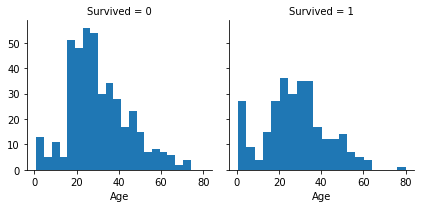

In [19]:
# visualizing age by survived
age_survived=sns.FacetGrid(titanic_train,col="Survived").map(plt.hist,"Age",bins=20)

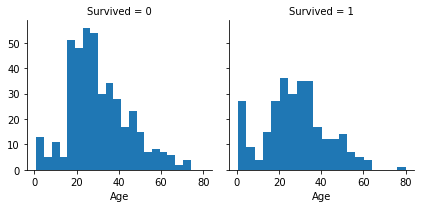

In [20]:
pclass_survived=sns.FacetGrid(titanic_train,col="Survived").map(plt.hist,"Age",bins=20)

In [21]:
 titanic_train[titanic_train.Survived==1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

# Visualize the count of survivers using columns - Sex, Pclass, Embarked

Text(0, 0.5, '')

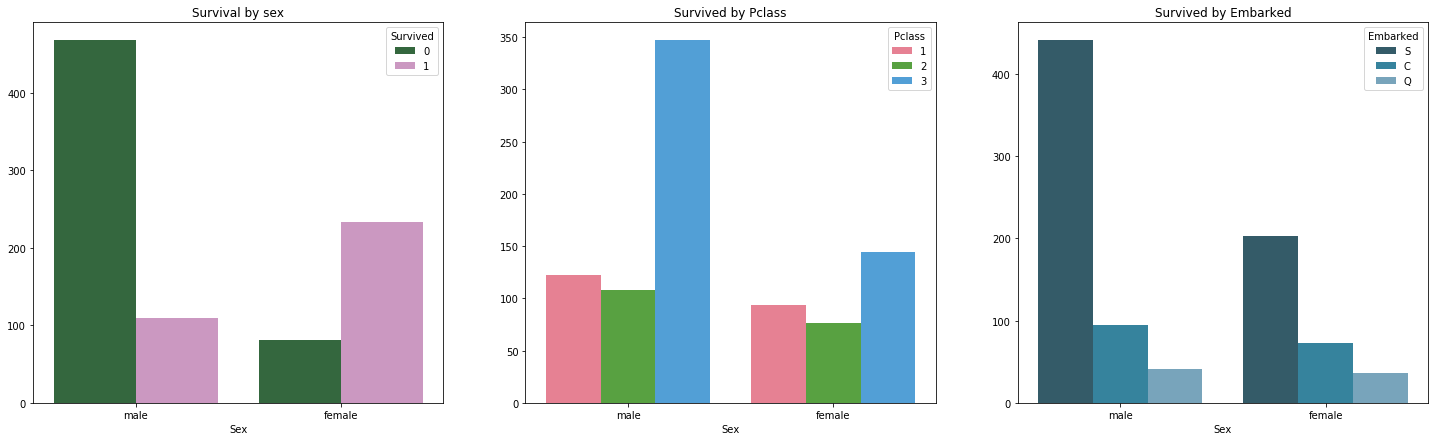

In [22]:
# 0 = Not Survived
# 1 = Survived


fig, axes=plt.subplots(1,3,figsize=(25,7))
sns.countplot(x="Sex",hue="Survived",data=titanic_train,ax=axes[0],palette="cubehelix")
axes[0].set_title("Survival by sex")
axes[0].set_ylabel("")

sns.countplot(x="Sex",hue="Pclass",data=titanic_train,ax=axes[1],palette="husl")
axes[1].set_title("Survived by Pclass")
axes[1].set_ylabel("")

sns.countplot(x="Sex",hue="Embarked",data=titanic_train,ax=axes[2],palette="PuBuGn_d")
axes[2].set_title("Survived by Embarked")
axes[2].set_ylabel("")

In [23]:
# Look at survival rate by sex
titanic_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Clearly, survival chances of males is very low when compared to females.
We can also recall from the movie, females & children were given 1st preference while loading on a life-boat & this statistics proves it.

In [24]:
# Survival rate by sex and class
titanic_train.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


1st class has the highest survival rate
Females from 1st class have the highest survival rate of 96.8%
Survival rate of males overall is very less, survival of males in 1st class is 36.8% which is still lower than the survival chances of females in 3rd class which is 50%

D:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, '')

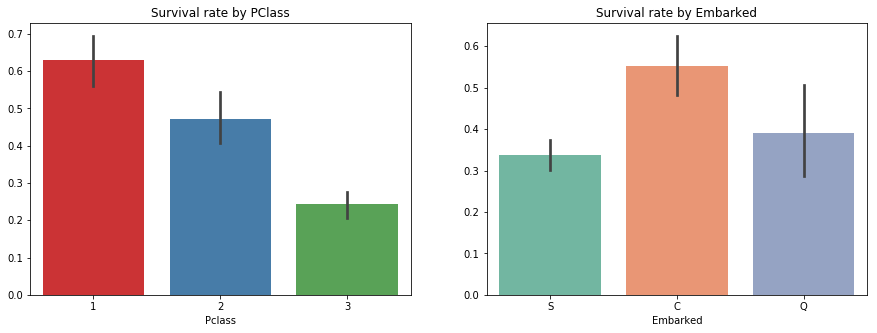

In [25]:
fig, axes=plt.subplots(1,2, figsize=(15,5))
sns.barplot(x="Pclass",y="Survived",data=titanic_train,palette="Set1",ax=axes[0])
axes[0].set_title('Survival rate by PClass')
axes[0].set_ylabel('')

sns.barplot(x="Embarked",y="Survived",data=titanic_train,palette="Set2",ax=axes[1])
axes[1].set_title("Survival rate by Embarked")
axes[1].set_ylabel('')




In [26]:
# Survival rate bt age, class & sex
age=pd.cut(titanic_train["Age"],[0,18,30,80])
titanic_train.pivot_table("Survived",("Sex",age),"Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 80]  0.980000  0.900000  0.304348
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 80]  0.360000  0.106383  0.112500

# Some Inferences from the above table
Interesting - females from 2nd class of (infants + teenagers) have a surival rate of 100%
A female who is 30yrs and above & belongs to 1st class, then the chances of survival is 98%
Survival rate of adult females from 3rd class is 30.4% which is still way higher than the adult males of 2nd class i.e; 10.6%
Highest survival chances in males is 80% who belong to 1st class (infants + teenagers)
Survival chances of males belonging to 18-30 age group from 2nd class is almost negliable - only 2.7%

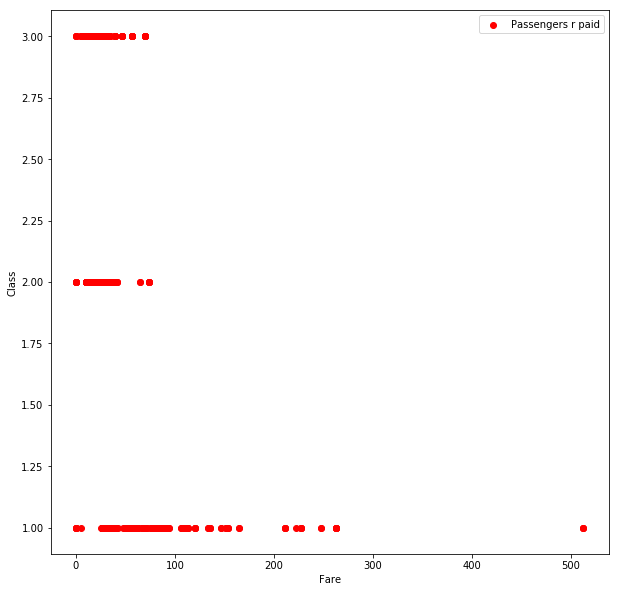

In [27]:
# Prices paid by each class

plt.figure(figsize=(10,10))
plt.scatter(titanic_train["Fare"],titanic_train["Pclass"],label="Passengers r paid", color="red")
plt.ylabel("Class")
plt.xlabel("Fare")
plt.legend()
plt.show()

All the point on the scatter plot represents each passenger. We did see earlier that some passengers were travelling at 0 pounds as well & passengers who paid more than 100 pounds belong to 1st class

In [28]:
#Try uncommenting the below code, we can see that the functions that we were using till now like, info(). describe(), isnull().sum(), etc, all can be viewed at once with the below function.
#PS: It uses a lot of RAM

# import pandas_profiling as pp
# pp.ProfileReport(titanic_train)

# DATA MANUPULATION

In [29]:
#Deleting columns which are of no use

# Train Set

titanic_train=titanic_train.drop(["PassengerId", "Ticket"],axis=1)

# Submission
submission=pd.DataFrame(columns=["PassengerId", "Survived"])
submission["PassengerId"]=titanic_test["PassengerId"]

# test dataset
titanic_test = titanic_test.drop(["PassengerId", "Ticket"], axis=1)

In [31]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


# Check for missing values

In [32]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

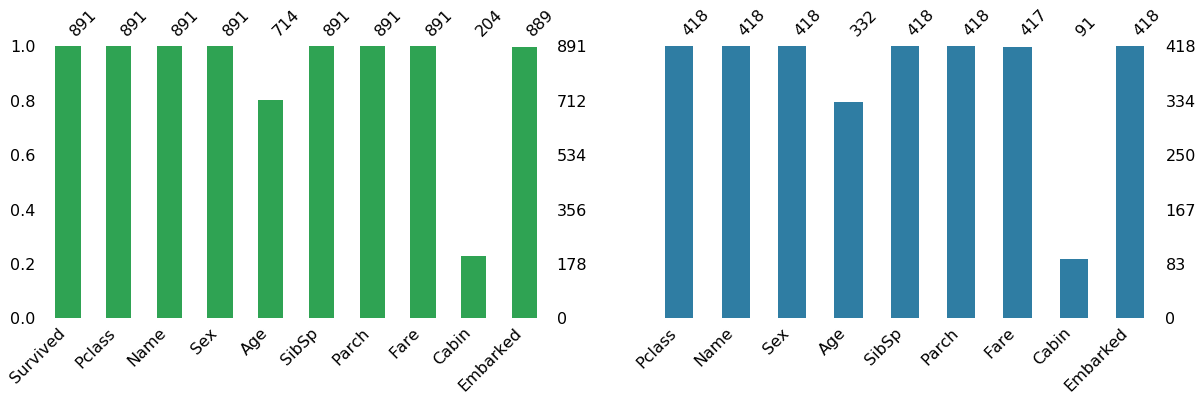

In [34]:
# bar plot missing value

fig, axis=plt.subplots(1,2 ,figsize=(20,5),sharey=True)

msno.bar(titanic_train,ax=axis[0],color='#2FA353')

msno.bar(titanic_test,ax=axis[1], color='#2F7DA3')

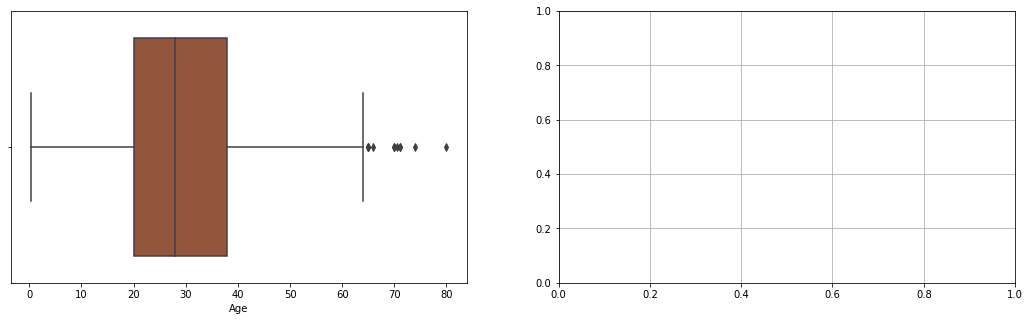

In [39]:
# Let's see if there are any outliers in the Age feature in Training set
    
# Checking for outliers, helps to decide what should be used, Mean or Media to fill NAN values.

fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.boxplot(y="Age",data=titanic_train, orient="h", color="#A34E2F", ax=axes[0])
sns.set_color_codes(palette="colorblind")
# sns.distplot(titanic_train['Age'],color="#2FA39C", ax=axes[1])
plt.grid()

# As we can see there are few outliers in Age attribute & also it is positive skewed, we shall use 
# median to fill the missing values.

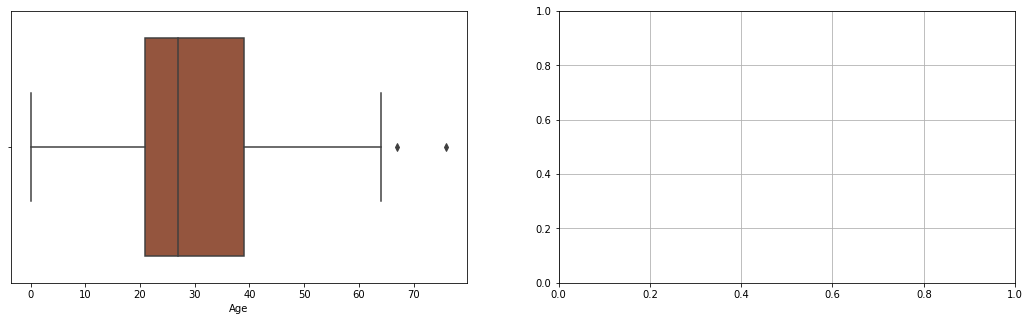

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.boxplot(y="Age",data=titanic_test, orient="h", color="#A34E2F", ax=axes[0])
sns.set_color_codes(palette="colorblind")
# sns.distplot(titanic_test['Age'],color="#2FA39C", ax=axes[1])
plt.grid()

# We can see there are few outliers in the test data set also, so we shall fill this with ``Median`

In [42]:
#Filling Age missing values of training & test data set with Median

titanic_train["Age"].fillna(titanic_train["Age"].median(), inplace=True)
titanic_test["Age"].fillna(titanic_test["Age"].median(), inplace=True)

In [43]:
# As we saw earlier also in the graph
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We can see majority of passengers borded from Southampton but we saw earlier the survival rate of Cherbourg is high so, we would fill the missing values with Cherbourg

In [44]:
# Fill NAN of Embarked in training set with 'S'
titanic_train["Embarked"].fillna("C", inplace = True)

In [45]:
# Fill Missing Values for Cabin in training set with 0
titanic_train["Cabin"] = titanic_train["Cabin"].apply(lambda x: str(x)[0])
titanic_train.groupby(["Cabin", "Pclass"])["Pclass"].count()

Cabin  Pclass
A      1          15
B      1          47
C      1          59
D      1          29
       2           4
E      1          25
       2           4
       3           3
F      2           8
       3           5
G      3           4
T      1           1
n      1          40
       2         168
       3         479
Name: Pclass, dtype: int64

In [46]:
titanic_train["Cabin"] = titanic_train["Cabin"].replace("n", 0)
titanic_train["Cabin"] = titanic_train["Cabin"].replace(["A", "B", "C", "D", "E", "T"], 1)
titanic_train["Cabin"] = titanic_train["Cabin"].replace("F", 2)
titanic_train["Cabin"] = titanic_train["Cabin"].replace("G", 3)

In [48]:
titanic_test["Cabin"] = titanic_test["Cabin"].apply(lambda x: str(x)[0])
titanic_test.groupby(["Cabin", "Pclass"])["Pclass"].count()

Cabin  Pclass
A      1           7
B      1          18
C      1          35
D      1          11
       2           2
E      1           9
F      2           5
       3           3
G      3           1
n      1          27
       2          86
       3         214
Name: Pclass, dtype: int64

In [49]:
titanic_test["Cabin"] = titanic_test["Cabin"].replace("n", 0)
titanic_test["Cabin"] = titanic_test["Cabin"].replace(["A", "B", "C", "D", "E"], 1)
titanic_test["Cabin"] = titanic_test["Cabin"].replace("F", 2)
titanic_test["Cabin"] = titanic_test["Cabin"].replace("G", 3)

In [50]:
#Creating new variable Family Size & Alone
# Train Set
titanic_train["Family"] = titanic_train["SibSp"]+titanic_train["Parch"]

#Test Set
titanic_test["Family"] = titanic_test["SibSp"]+titanic_test["Parch"]

In [51]:
# 1 If alone & 0 if it has family members
titanic_train["Alone"] = titanic_train["Family"].apply(lambda x:1 if x==0 else 0)
titanic_test["Alone"] = titanic_test["Family"].apply(lambda x:1 if x==0 else 0)

In [52]:
titanic_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Alone
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,Q,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,S,1,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,Q,0,1


In [53]:
# Checkin the row were there is misisng value for Fare
titanic_test[titanic_test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Alone
152,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,0,S,0,1


In [54]:
# Considering the other features, filling the NAN value of Fare accordingly
m_fare = titanic_test[(titanic_test["Pclass"] == 3) & (titanic_test["Embarked"] == "S") & (titanic_test["Alone"] == 1)]["Fare"].mean()
m_fare

9.339329670329667

In [55]:
titanic_test["Fare"] = titanic_test["Fare"].fillna(m_fare)

In [56]:
def title(name):
    for string in name.split():
        if "." in string:
            return string[:-1]

titanic_train["Title"] = titanic_train["Name"].apply(lambda x: title(x))
titanic_test["Title"] = titanic_test["Name"].apply(lambda x: title(x))

print(titanic_train["Title"].value_counts())
print(titanic_test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Sir           1
Capt          1
Don           1
Lady          1
Countess      1
Mme           1
Ms            1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64


In [57]:
for titanic in [titanic_train, titanic_test]:
    titanic["Title"] = titanic["Title"].replace(["Dr", "Rev", "Major", "Col", "Capt", "Lady", "Jonkheer", "Sir", "Don", "Countess", "Dona"], "Others")
    titanic["Title"] = titanic["Title"].replace("Mlle", "Miss")
    titanic["Title"] = titanic["Title"].replace("Ms", "Miss")
    titanic["Title"] = titanic["Title"].replace("Mme", "Mr")


In [58]:
# Remove few more columns

titanic_train = titanic_train.drop(["Name", "SibSp", "Parch"], axis=1)
titanic_test = titanic_test.drop(["Name", "SibSp", "Parch"], axis=1)

In [59]:
# Print the unique values of the categorical columns
print(titanic_train['Sex'].unique())
print(titanic_train['Embarked'].unique())
print(titanic_train['Title'].unique())

['male' 'female']
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Others']


In [61]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
var_mod = ['Sex','Embarked','Title']
for i in var_mod:
    titanic_train[i] = label_encode.fit_transform(titanic_train[i])
    titanic_test[i] = label_encode.fit_transform(titanic_test[i])

In [62]:
# From Sklearn library we will ues Label Encoder to encode cat features to numeric
#label_encode = LabelEncoder()

#For titanic_train set

#titanic_train.iloc[:,2] = label_encode.fit_transform(titanic_train.iloc[:,2].values)
#titanic_train.iloc[:,6] = label_encode.fit_transform(titanic_train.iloc[:,6].values)
#titanic_train.iloc[:,9] = label_encode.fit_transform(titanic_train.iloc[:,9].values)

# For titanic_test set

#titanic_test.iloc[:,1] = label_encode.fit_transform(titanic_test.iloc[:,1].values)
#titanic_test.iloc[:,5] = label_encode.fit_transform(titanic_test.iloc[:,5].values)
#titanic_test.iloc[:,8] = label_encode.fit_transform(titanic_test.iloc[:,8].values)

In [63]:
titanic_train = pd.get_dummies(titanic_train, columns =['Sex','Embarked','Cabin', 'Pclass', 'Title'])
titanic_test = pd.get_dummies(titanic_test, columns =['Sex','Embarked', 'Cabin', 'Pclass', 'Title'])

In [64]:
# Split the titanic_train data set into features ``x`` & label ``y``
x = titanic_train.iloc[:,1:22].values
y = titanic_train.iloc[:,0].values

In [65]:
# Splitting the data set into 80% Training & 20% Testing
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state = 42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((712, 21), (179, 21), (712,), (179,))

In [66]:
feature_scale = StandardScaler()
train_x = feature_scale.fit_transform(train_x)
test_x = feature_scale.transform(test_x)

In [67]:
# Scaling titanic_test data set as well
scale_test_data = feature_scale.fit_transform(titanic_test)

D:\python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\python\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [68]:
scale_test_data.shape

(418, 21)

# Creating a Function with multiple models

In [69]:
def models(train_x, train_y):
    
    #Logistic Regression
    log_reg = LogisticRegression(solver = 'lbfgs', random_state = 42)
    log_reg.fit(train_x,train_y)
    
    #KNN
    knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
    knn.fit(train_x, train_y)
    
    #SVC Linear
    svc_lin = SVC(kernel = 'linear', random_state=42)
    svc_lin.fit(train_x, train_y)
    
    #SVC RBF
    svc_rbf = SVC(kernel = 'rbf', random_state=42)
    svc_rbf.fit(train_x, train_y)
    
    #Decision Tree Classifier
    dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dec_tree.fit(train_x, train_y)
    
    #Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=10, random_state=42)
    rf.fit(train_x, train_y)
    
    #Printing accuracy for every model
    print('[0] Logistic Regression training accuracy: ', log_reg.score(train_x, train_y))
    print('[1] KNN training accuracy: ', knn.score(train_x, train_y))
    print('[2] SVC_Linear training accuracy: ', svc_lin.score(train_x, train_y))
    print('[3] SVC_RBF training accuracy: ', svc_rbf.score(train_x, train_y))
    print('[4] Decision Tree training accuracy: ', dec_tree.score(train_x, train_y))
    print('[5] Random Forest training accuracy: ', rf.score(train_x, train_y))
        
    return log_reg, knn, svc_lin, svc_rbf, dec_tree, rf

In [70]:
# Get and Train all the models
model = models(train_x, train_y)

[0] Logistic Regression training accuracy:  0.8469101123595506
[1] KNN training accuracy:  0.8721910112359551
[2] SVC_Linear training accuracy:  0.8370786516853933
[3] SVC_RBF training accuracy:  0.8525280898876404
[4] Decision Tree training accuracy:  0.9845505617977528
[5] Random Forest training accuracy:  0.9143258426966292


In [71]:
# Creating confusion matrix and see the accuracy for all the models for test data

for i in range( len(model) ):
    cm  = confusion_matrix(test_y, model[i].predict(test_x))
    
    # Extract the confusion matrix parameters
    TN, FP, FN, TP = confusion_matrix(test_y, model[i].predict(test_x)).ravel()
    
    test_score = (TP+TN) / (TP+TN+FP+FN)
    
    print(cm)
    print('Model[{}] Testing Accuracy ="{}"'.format(i, test_score))
    print()

[[89 16]
 [16 58]]
Model[0] Testing Accuracy ="0.8212290502793296"

[[88 17]
 [18 56]]
Model[1] Testing Accuracy ="0.8044692737430168"

[[91 14]
 [19 55]]
Model[2] Testing Accuracy ="0.8156424581005587"

[[93 12]
 [21 53]]
Model[3] Testing Accuracy ="0.8156424581005587"

[[85 20]
 [19 55]]
Model[4] Testing Accuracy ="0.7821229050279329"

[[93 12]
 [21 53]]
Model[5] Testing Accuracy ="0.8156424581005587"



In [72]:
# Get Important Features for Random Forest
rf = model[5]
importance = pd.DataFrame({'Features': titanic_train.iloc[:,1:22].columns, 'Importance' : np.round(rf.feature_importances_,3)})
importance = importance.sort_values('Importance', ascending = False).set_index('Features')
importance


,Importance
Features,
Fare,0.192
Age,0.156
Sex_1,0.123
Title_2,0.088
Family,0.082
Sex_0,0.076
Pclass_3,0.061
Title_3,0.034
Title_1,0.025


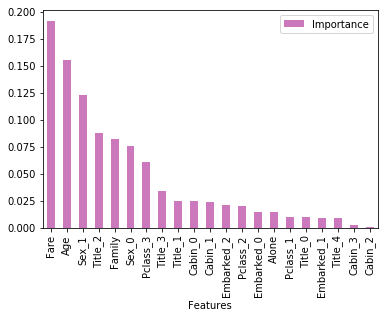

In [73]:
# Visualize the important features
importance.plot.bar(color='m')
plt.show()

In [74]:
# Printing the prediction of Random Forest
pred = model[5].predict(test_x)
print(pred)

print()

# Printing the actual values
print(test_y)

[1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1]

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [75]:
pred_rand_for = rf.predict(scale_test_data)
submission["Survived"] = pred_rand_for

In [76]:
submission.head(6)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
